In [375]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

In [376]:

data = pd.read_csv('addiction_population_data.csv')
data

,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,1,Michael Bates,66,Other,Yemen,Martinmouth,Secondary,Student,45595,Married,...,6,2,True,Good,Daily,Average,5.6,22.4,NaN,Current
1,2,Brian Thompson,29,Male,Saudi Arabia,Harperhaven,Primary,Self-Employed,145842,Single,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,NaN
2,3,Steven Little,75,Male,Togo,Chanport,Postgraduate,Unemployed,162480,Single,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,NaN
3,4,Michael Mathews,35,Other,Togo,North Cory,University,Unemployed,16023,In a relationship,...,5,7,False,Average,Daily,Good,7.2,25.5,Moderate,Current
4,5,Nicholas Sanchez,38,Female,Morocco,Danielberg,College,Self-Employed,62933,In a relationship,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Mary Bartlett,29,Other,Macedonia,Port Kimberly,Postgraduate,Employed,118269,Single,...,9,1,True,Poor,Never,Average,6.6,27.4,Moderate,Current
2996,2997,Beth Sanchez,51,Male,Saudi Arabia,Smithbury,College,Employed,35898,Widowed,...,9,2,True,Poor,Rarely,Good,4.3,27.7,Moderate,Past
2997,2998,Megan Duffy,15,Male,Falkland Islands (Malvinas),Clinebury,College,Retired,167501,Widowed,...,1,8,True,Poor,Rarely,Poor,6.6,23.5,Moderate,Past
2998,2999,Jeffery Lawson,38,Male,Bermuda,Colleenport,Secondary,Retired,135893,Married,...,9,3,False,Poor,Rarely,Poor,4.9,27.2,NaN,Current


In [377]:
data.drop(columns=["id", "name", "country", "city"], inplace=True)

In [378]:
data.isnull().sum()

age                             0
gender                          0
education_level               420
employment_status               0
annual_income_usd               0
marital_status                  0
children_count                  0
smokes_per_day                  0
drinks_per_week                 0
age_started_smoking             0
age_started_drinking            0
attempts_to_quit_smoking        0
attempts_to_quit_drinking       0
has_health_issues               0
mental_health_status            0
exercise_frequency              0
diet_quality                    0
sleep_hours                     0
bmi                             0
social_support                753
therapy_history              1014
dtype: int64

In [379]:
data.dtypes

age                            int64
gender                        object
education_level               object
employment_status             object
annual_income_usd              int64
marital_status                object
children_count                 int64
smokes_per_day                 int64
drinks_per_week                int64
age_started_smoking            int64
age_started_drinking           int64
attempts_to_quit_smoking       int64
attempts_to_quit_drinking      int64
has_health_issues               bool
mental_health_status          object
exercise_frequency            object
diet_quality                  object
sleep_hours                  float64
bmi                          float64
social_support                object
therapy_history               object
dtype: object

* Finding from Smoker

In [380]:
data['has_health_issues'] = data['has_health_issues'].astype(int)
data['is_heavy_smoker'] = (data['smokes_per_day'] > 5).astype(int)

In [381]:
label_enc = LabelEncoder()
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])

In [382]:
X = data.drop(columns=['smokes_per_day', 'is_heavy_smoker'])
y = data['is_heavy_smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [383]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.12]
}

In [384]:
from xgboost import XGBClassifier

treemodel_grid = XGBClassifier()
cv=GridSearchCV(treemodel_grid,param_grid=parameters,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], 'subsample': [0.7, 0.12]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and par

In [385]:
cv.best_params_

{'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}

In [386]:
cv.best_score_

np.float64(0.9379166666666666)

In [387]:
treemodel_grid = XGBClassifier(
    learning_rate=0.2,
    max_depth=9,
    n_estimators=100,
    subsample=0.7,
)

In [388]:
treemodel_grid.fit(X_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [389]:
y_pred = treemodel_grid.predict(X_test)
accuracy_score(y_test, y_pred)*100

93.66666666666667

In [390]:
treemodel_grid.feature_importances_.tolist()

[0.050930123776197433,
 0.054499100893735886,
 0.0513814315199852,
 0.04891829937696457,
 0.05679934844374657,
 0.0455954410135746,
 0.0407298319041729,
 0.041297316551208496,
 0.05179630592465401,
 0.056905873119831085,
 0.051430683583021164,
 0.0489371195435524,
 0.05553667992353439,
 0.04454629495739937,
 0.05678160488605499,
 0.06825367361307144,
 0.054596196860075,
 0.0432174913585186,
 0.043065015226602554,
 0.03478226810693741]

In [391]:
feature_importance_data = pd.DataFrame(
    {
        'Feature Name': X.columns,
        "Importance": treemodel_grid.feature_importances_
    }
)

In [392]:
sorted_data = feature_importance_data.sort_values(by="Importance", ascending=False)
sorted_data

,Feature Name,Importance
15,diet_quality,0.068254
9,age_started_drinking,0.056906
4,annual_income_usd,0.056799
14,exercise_frequency,0.056782
12,has_health_issues,0.055537
16,sleep_hours,0.054596
1,gender,0.054499
8,age_started_smoking,0.051796
10,attempts_to_quit_smoking,0.051431
2,education_level,0.051381


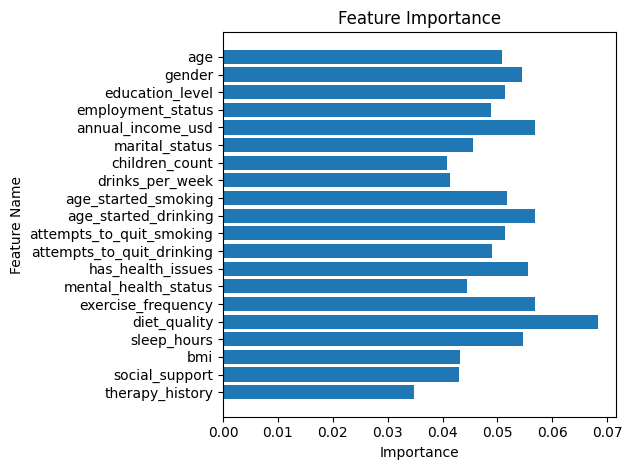

In [393]:
import matplotlib.pyplot as plt

plt.barh(
    feature_importance_data["Feature Name"],
    feature_importance_data["Importance"]
)
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [394]:
sorted_data.head(10).values

array([['diet_quality', 0.06825367361307144],
       ['age_started_drinking', 0.056905873119831085],
       ['annual_income_usd', 0.05679934844374657],
       ['exercise_frequency', 0.05678160488605499],
       ['has_health_issues', 0.05553667992353439],
       ['sleep_hours', 0.054596196860075],
       ['gender', 0.054499100893735886],
       ['age_started_smoking', 0.05179630592465401],
       ['attempts_to_quit_smoking', 0.051430683583021164],
       ['education_level', 0.0513814315199852]], dtype=object)

In [395]:
X_featured = data[['exercise_frequency', "has_health_issues",'sleep_hours', 'gender', 'attempts_to_quit_smoking', 'education_level', 'annual_income_usd', 'age_started_smoking', 'age', 'diet_quality']]

In [396]:
X_featured_train, X_featured_test, y_train, y_test = train_test_split(X_featured, y, test_size=0.3, random_state=42)

In [397]:
treemodel_grid.fit(X_featured_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [398]:
y_pred_fe = treemodel_grid.predict(X_featured_test)

In [399]:
accuracy_score(y_test, y_pred_fe)

0.9411111111111111

* For Alcohol

In [400]:
data['has_health_issues'] = data['has_health_issues'].astype(int)
data['is_heavy_drinker'] = (data['drinks_per_week'] > 7).astype(int)

In [ ]:
X = data.drop(columns=['drinks_per_week', 'is_heavy_drinker'])
y = data['is_heavy_drinker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test) 

In [402]:
treemodel_grid_a = XGBClassifier()
cv=GridSearchCV(treemodel_grid_a,param_grid=parameters,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], 'subsample': [0.7, 0.12]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and par

In [403]:
cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}

In [404]:
cv.best_score_

np.float64(0.8691666666666666)

In [405]:
treemodel_grid_a = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,
    subsample=0.7,
)

In [406]:
treemodel_grid_a.fit(X_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [407]:
y_pred = treemodel_grid_a.predict(X_test)
accuracy_score(y_test, y_pred)*100

88.0

In [408]:
treemodel_grid_a.feature_importances_.tolist()

[0.05312490463256836,
 0.0625285804271698,
 0.05263250693678856,
 0.0451943539083004,
 0.0567440465092659,
 0.05112092196941376,
 0.06483518332242966,
 0.04394087195396423,
 0.051424022763967514,
 0.054171718657016754,
 0.05315057933330536,
 0.059583619236946106,
 0.035822831094264984,
 0.04482787474989891,
 0.04272054508328438,
 0.0,
 0.05006636679172516,
 0.05187804251909256,
 0.05408850684762001,
 0.0721445232629776,
 0.0]

In [409]:
feature_importance_data = pd.DataFrame(
    {
        'Feature Name': X.columns,
        "Importance": treemodel_grid_a.feature_importances_
    }
)

In [410]:
sorted_data = feature_importance_data.sort_values(by="Importance", ascending=False)
sorted_data

,Feature Name,Importance
19,therapy_history,0.072145
6,children_count,0.064835
1,gender,0.062529
11,attempts_to_quit_drinking,0.059584
4,annual_income_usd,0.056744
9,age_started_drinking,0.054172
18,social_support,0.054089
10,attempts_to_quit_smoking,0.053151
0,age,0.053125
2,education_level,0.052633


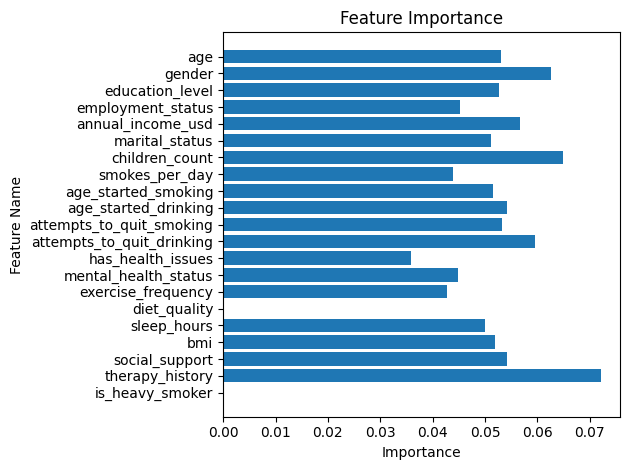

In [411]:
plt.barh(
    feature_importance_data["Feature Name"],
    feature_importance_data["Importance"]
)
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [412]:
sorted_data.head(10)

,Feature Name,Importance
19,therapy_history,0.072145
6,children_count,0.064835
1,gender,0.062529
11,attempts_to_quit_drinking,0.059584
4,annual_income_usd,0.056744
9,age_started_drinking,0.054172
18,social_support,0.054089
10,attempts_to_quit_smoking,0.053151
0,age,0.053125
2,education_level,0.052633


In [413]:
X_featured = data[['therapy_history', 'children_count', 'gender', 'attempts_to_quit_drinking', 'annual_income_usd', 'age_started_drinking', 'social_support', 'attempts_to_quit_smoking', 'age', 'education_level']]

In [414]:
X_featured_train, X_featured_test, y_train, y_test = train_test_split(X_featured, y, test_size=0.3, random_state=42)

In [415]:
treemodel_grid_a.fit(X_featured_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [416]:
y_pred_fe_ = treemodel_grid_a.predict(X_featured_test)


In [418]:
accuracy_score(y_test, y_pred_fe_)

0.8788888888888889